<a href="https://colab.research.google.com/github/Pavan-pk/deep_nn/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(None, 7, 7, 128)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_19 (Flatten)         (None, 6272)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 12546     
Total params: 105,218
Trainable params: 105,218
Non-trainable params: 0
____________________________________________________

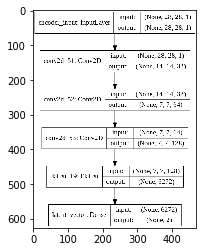

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 6272)              18816     
_________________________________________________________________
reshape_19 (Reshape)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_51 (Conv2DT (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_transpose_52 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_53 (Conv2DT (None, 28, 28, 128)       36992     
_________________________________________________________________
decoder_output (Conv2DTransp (None, 28, 28, 1)         1153      
Total para

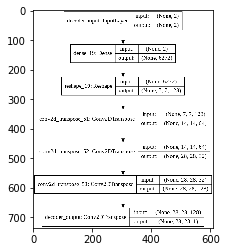

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 2)                 105218    
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         149217    
Total params: 254,435
Trainable params: 254,435
Non-trainable params: 0
_________________________________________________________________


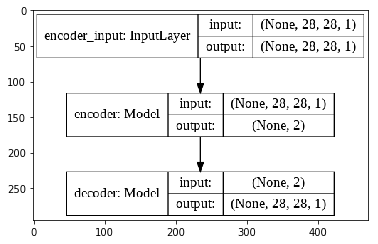

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.0493 - val_loss: 0.0430
Epoch 2/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.0420 - val_loss: 0.0409
Epoch 3/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.0406 - val_loss: 0.0404
Epoch 4/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.0397 - val_loss: 0.0395
Epoch 5/50
60000/60000 [==============================] - 16s 268us/step - loss: 0.0391 - val_loss: 0.0391
Epoch 6/50
60000/60000 [==============================] - 16s 267us/step - loss: 0.0386 - val_loss: 0.0388
Epoch 7/50
60000/60000 [==============================] - 16s 269us/step - loss: 0.0382 - val_loss: 0.0385
Epoch 8/50
60000/60000 [==============================] - 16s 274us/step - loss: 0.0379 - val_loss: 0.0381
Epoch 9/50
60000/60000 [==============================] - 16s 271us/step - loss: 0.0376 - val_

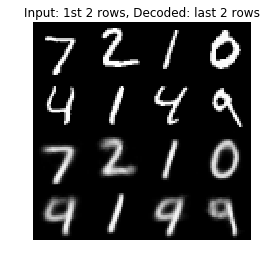

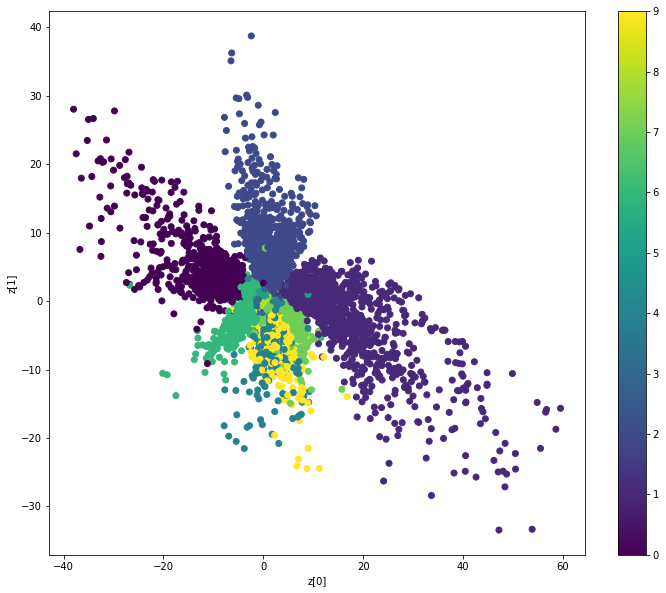

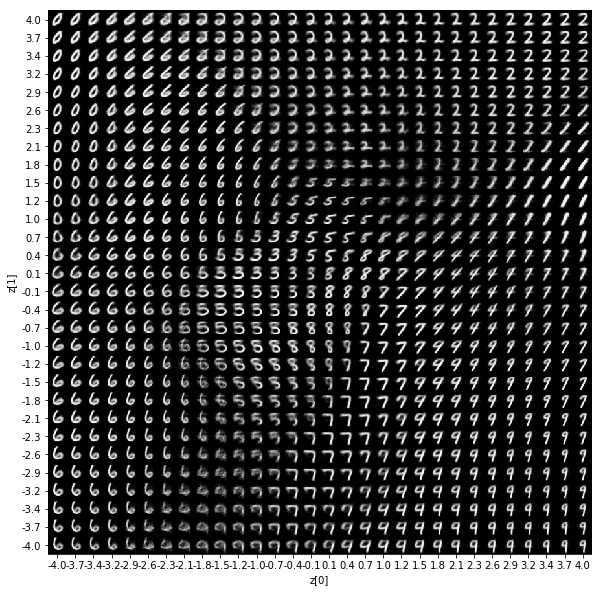

In [21]:
from keras.layers import Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras.datasets import mnist
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os


def plot_results(models,
                 data,
                 batch_size=32,
                 model_name="autoencoder_2dim"):

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "latent_2dim.png")
    # display a 2D plot of the digit classes in the latent space
    z = encoder.predict(x_test,
                        batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z[:, 0], z[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of the digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z = np.array([[xi, yi]])
            x_decoded = decoder.predict(z)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()


# load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape to (28, 28, 1) and normalize input images
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 1)
batch_size = 32
kernel_size = 3
latent_dim = 2
# encoder/decoder number of CNN layers and filters per layer
layer_filters = [32, 64]
layer_filter_two = 128

# build the autoencoder model
# first build the encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# stack of Conv2D(32)-Conv2D(64)
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               activation='relu',
               strides=2,
               padding='same')(x)

x = Conv2D(filters=layer_filter_two,
           kernel_size=kernel_size,
           activation='relu',
           padding='same')(x)

# shape info needed to build decoder model so we don't do hand computation
# the input to the decoder's first Conv2DTranspose will have this shape
# shape is (7, 7, 64) which is processed by the decoder back to (28, 28, 1)
shape = K.int_shape(x)
print(shape)
# generate latent vector
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)

# instantiate encoder model
encoder = Model(inputs, latent, name='encoder')
encoder.summary()
plot_model(encoder, to_file='encoder.png', show_shapes=True)
img = mpimg.imread('encoder.png')
plt.imshow(img)
plt.show()

# build the decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# use the shape (7, 7, 64) that was earlier saved
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# from vector to suitable shape for transposed conv
x = Reshape((shape[1], shape[2], shape[3]))(x)
# stack of Conv2DTranspose(64)-Conv2DTranspose(32)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')(x)
x = Conv2DTranspose(filters=layer_filter_two,
                    kernel_size=kernel_size,
                    activation='relu',
                    padding='same')(x)

# reconstruct the input

outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='decoder.png', show_shapes=True)
img = mpimg.imread('decoder.png')
plt.imshow(img)
plt.show()

# autoencoder = encoder + decoder
# instantiate autoencoder model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)
img = mpimg.imread('autoencoder.png')
plt.imshow(img)
plt.show()

# Mean Square Error (MSE) loss function, Adam optimizer
autoencoder.compile(loss='mse', optimizer='adam')

# train the autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=50,
                batch_size=batch_size)

# predict the autoencoder output from test data
x_decoded = autoencoder.predict(x_test)

# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()

# project the 2-dim latent on 2D space
models = (encoder, decoder)
data = (x_test, y_test)
plot_results(models, data,
             batch_size=batch_size,
             model_name="autonencoder-2dim")
